<a href="https://colab.research.google.com/github/komalshyam/LMVVIP-DataScience/blob/main/LGM_Task_3_Iris_Flowers_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading the dataset

In [2]:
#defining the features
features = ["sepal_length", "sepal_width","petal_length", "petal_width", "target_class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = features) #reading the dataset

Displaying the first five rows of the dataset

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Displaying the information about the dataset

In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target_class  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Checking for the null values in the dataset

In [6]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target_class    0
dtype: int64

Describing the dataset

In [7]:
#Analysing the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Visualising the dataset

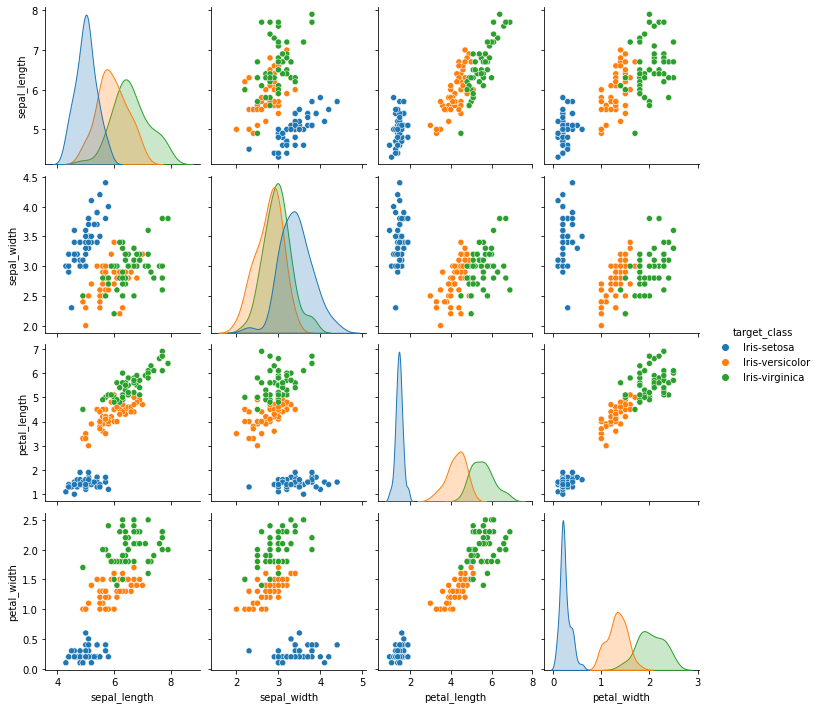

In [8]:
sns.pairplot(df, hue = 'target_class')

In [9]:
TargetClass = {}
TargetClass["Iris-setosa"] = (df["target_class"] == 'Iris-setosa').sum()
TargetClass["Iris-versicolor"] = (df["target_class"] == 'Iris-versicolor').sum()
TargetClass["Iris-virginica"] = (df["target_class"] == 'Iris-virginica').sum()

print(TargetClass)

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


Visualising the above findings using a pie chart.

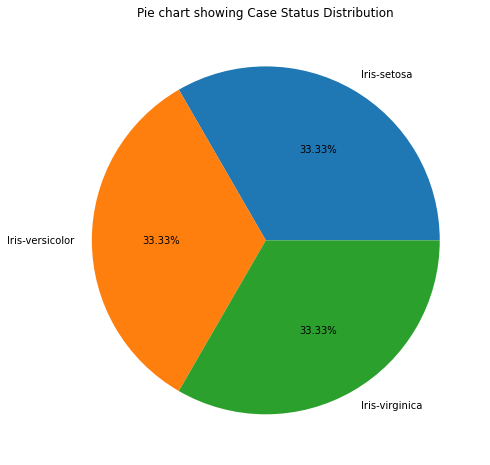

In [10]:
labels = []
count = []
for x, y in TargetClass.items():
    labels.append(x)
    count.append(y)
plt.figure(figsize = (8, 8))
plt.pie(count, labels=labels,autopct='%1.2f%%')
plt.title('Pie chart showing Case Status Distribution')
plt.show()

Separating the features and the target class

In [11]:
X = df.drop('target_class', axis = 1)
Y = df['target_class']

In [12]:
X.shape

(150, 4)

In [13]:
Y.shape

(150,)

Splitting the dataset

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 105 )

In [15]:
Y_train.value_counts()

Iris-setosa        42
Iris-versicolor    41
Iris-virginica     37
Name: target_class, dtype: int64

Model Training and Evaluation

In [16]:
#Training the Logistic Regression Model on the training dataset
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

Model Evaluation

In [17]:
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy*100,'%')

96.66666666666667 %


Plotting the classification matrix

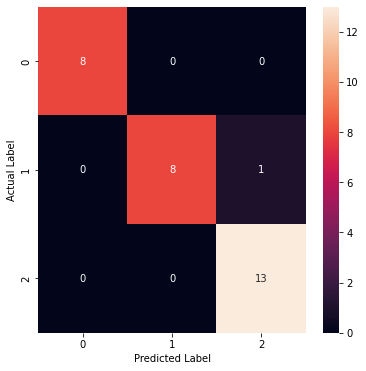

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]])

In [18]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
CM

Printing the classification report.

In [19]:
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30

